In [1]:
import seaborn as sns
import pandas as pd 
import datetime as datetime
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np
# Read data from file 'filename.csv' |
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
pd.options.display.float_format = '{:,.2f}'.format
data = pd.read_csv("/home/anconam/projects/Shapley_Pruning/experiments/results/log.csv.tranfer") 
data['timestamp'].apply(lambda row: str(row))
data

,timestamp,epoch,train_acc,test_acc,test_acc_pp,train_loss,test_loss,test_loss_pp,n_params,flops,n_params_full,layers,train_time,prune_time,experiment
0,20200204T111914,0.00,0.00,0.78,0.78,0.00,0.94,0.94,"135,088,384.00","62,511,947,776.00","135,088,384.00",4096-4096-512-512-512-512-512-512-256-256-256-...,0.00,0.00,cub200__sv-loss-2std#5_gap:10.0_steps:14_start...
1,20200204T112030,0.00,0.00,0.78,0.78,0.00,0.94,0.94,"135,088,384.00","62,511,947,776.00","135,088,384.00",4096-4096-512-512-512-512-512-512-256-256-256-...,0.00,0.00,cub200__sv-loss-2std#5_gap:10.0_steps:14_start...
2,20200204T112030,0.07,0.00,0.78,0.77,0.00,0.94,0.85,"127,645,992.00","62,455,193,600.00","135,088,384.00",2364-4096-512-512-512-512-512-512-256-256-256-...,0.00,166.63,cub200__sv-loss-2std#5_gap:10.0_steps:14_start...
3,20200204T112030,1.00,0.83,0.79,0.76,0.74,0.79,0.87,"127,645,992.00","62,455,193,600.00","135,088,384.00",2364-4096-512-512-512-512-512-512-256-256-256-...,86.60,230.40,cub200__sv-loss-2std#5_gap:10.0_steps:14_start...
4,20200204T112030,2.00,0.81,0.79,0.77,0.83,0.78,0.84,"78,505,112.00","62,095,933,440.00","135,088,384.00",2364-2306-512-512-512-512-512-512-256-256-256-...,87.65,108.15,cub200__sv-loss-2std#5_gap:10.0_steps:14_start...
5,20200204T112030,3.00,0.79,0.79,0.78,0.88,0.77,0.81,"63,570,048.00","61,636,825,088.00","135,088,384.00",2364-2306-385-512-512-512-512-512-256-256-256-...,87.68,378.71,cub200__sv-loss-2std#5_gap:10.0_steps:14_start...
6,20200204T112030,4.00,0.81,0.79,0.77,0.85,0.76,0.85,"62,569,400.00","61,188,562,944.00","135,088,384.00",2364-2306-385-388-512-512-512-512-256-256-256-...,87.01,604.78,cub200__sv-loss-2std#5_gap:10.0_steps:14_start...
7,20200204T112030,5.00,0.79,0.78,0.77,0.91,0.79,0.86,"61,176,364.00","60,566,777,856.00","135,088,384.00",2364-2306-385-388-340-512-512-512-256-256-256-...,85.83,758.31,cub200__sv-loss-2std#5_gap:10.0_steps:14_start...
8,20200204T112030,6.00,0.79,0.78,0.78,0.93,0.81,0.83,"60,018,764.00","58,383,302,656.00","135,088,384.00",2364-2306-385-388-340-361-512-512-256-256-256-...,83.32,"1,546.76",cub200__sv-loss-2std#5_gap:10.0_steps:14_start...
9,20200204T130546,0.00,0.00,0.78,0.78,0.00,0.94,0.94,"135,088,384.00","62,511,947,776.00","135,088,384.00",4096-4096-512-512-512-512-512-512-256-256-256-...,0.00,0.00,cub200__taylor-abs_gap:10.0_steps:14_start:0_i...


### FMNIST CNN 1.8M parameters

In [2]:

COLORS = ["orange",
          "#4e79a7",
          "#59a14f",
          "#9c755f",
          "#666666",
          "#e15759",
          "#b07aa1",
          "#BEAD53",
          "grey"]

map_names = {

    "random": ("Random", COLORS[0]),
    "grad": ("Saliency",COLORS[2]),
    "taylor-abs": ("Taylor",COLORS[1]),
    "count": ("APoZ",COLORS[8]),
    "weight": ("$||w||_1$",COLORS[6]),
    
    # Additional
    "sv-loss-2std#5": ("SV (5 samples)", COLORS[5]),
#      "sv-loss-2std-b#5": ("SV lr0.002",COLORS[3]),
#      "sv-loss-abs#5": ("SV ABS", "blue"),
#     "sv-loss#5": ("SV Classic", "black"),
}

def format_plt(ax, title, xlabel, ylabel):
    plt.sca(ax)
    plt.box(False)
    plt.tick_params(color="#222222", labelcolor="#222222")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.gca().yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
    if title is not None:
        plt.title(title)

plt.rcParams["image.cmap"] = "Set1"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=COLORS)
plt.rcParams.update({'font.size': 15})

In [3]:
dataset = "cub200"

plot_df = data[data["experiment"].str.startswith(dataset)]
# plot_df = plot_df[plot_df["timestamp"] >= "steps:1"]
# plot_df = plot_df[plot_df["experiment"].str.contains("s:0.5")]
plot_df = plot_df[plot_df["experiment"].str.contains("gap:10")]

# plot_df = plot_df[~plot_df["experiment"].str.contains("in1ep")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("random")]
# plot_df = plot_df[~plot_df["experiment"].str.contains("30steps")]

# Some processing
# Some processing
plot_df['test_acc'] *= 100
plot_df['test_acc_pp'] *= 100
plot_df['train_acc'] *= 100
plot_df["total_time"] = plot_df["train_time"] + plot_df["prune_time"]
plot_df["sparsity"] = plot_df["n_params"] / plot_df["n_params_full"] * 100
plot_df["test_acc_gap"] = (plot_df["test_acc"] - plot_df["test_acc"].max())
plot_df["total_time_cum"] = plot_df.groupby(['experiment', 'timestamp'])['total_time'].apply(lambda x: x.cumsum())



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


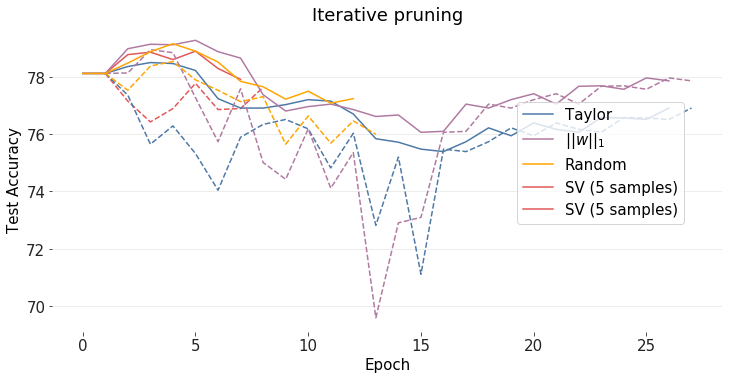

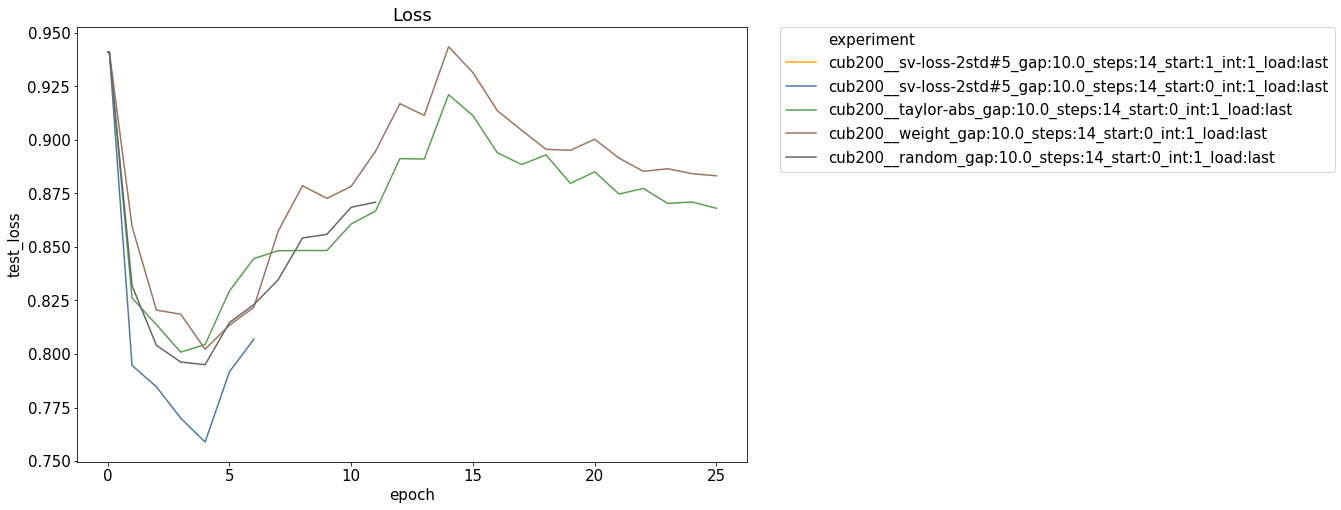

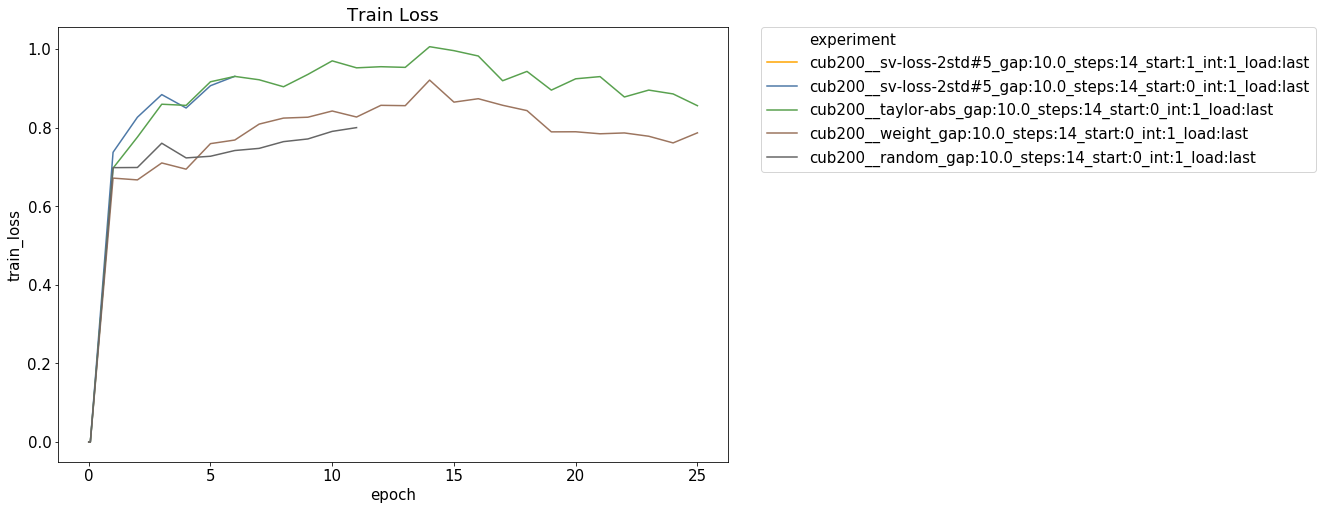

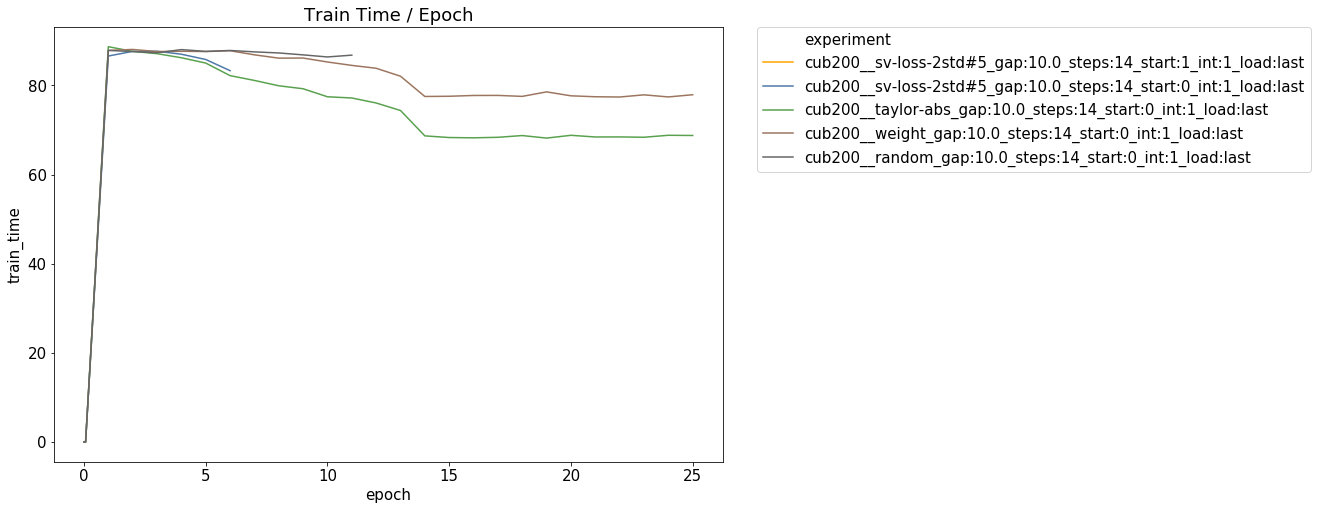

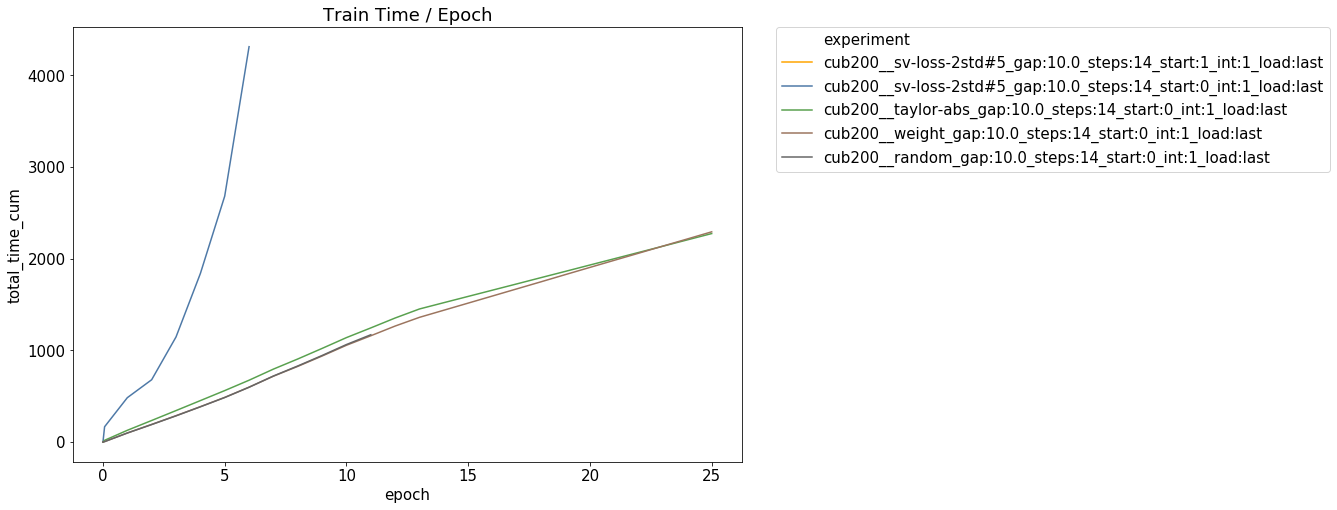

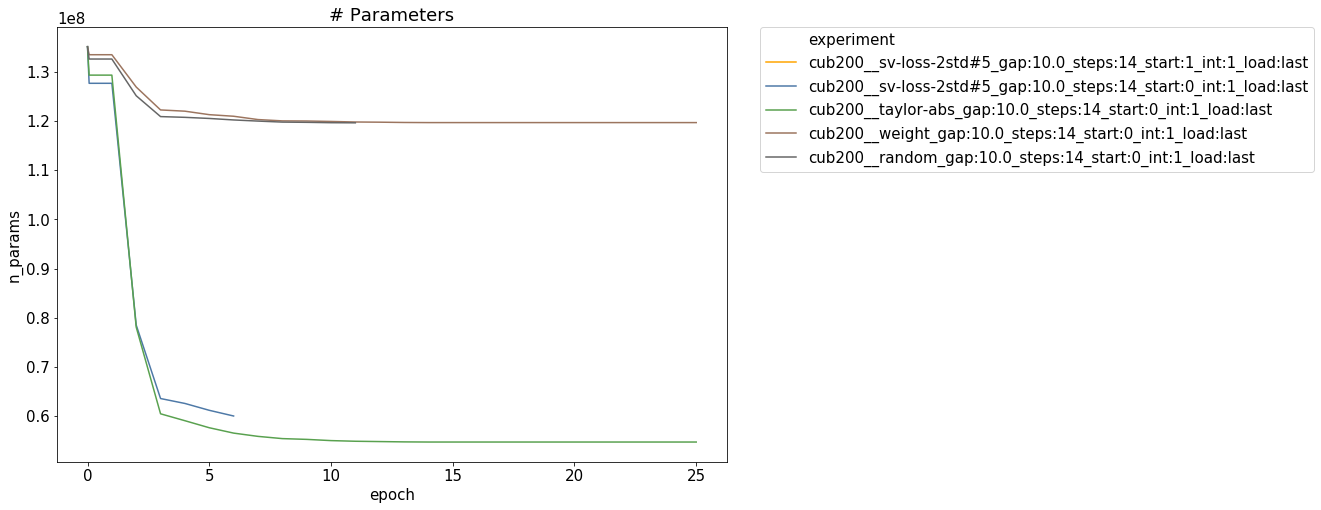

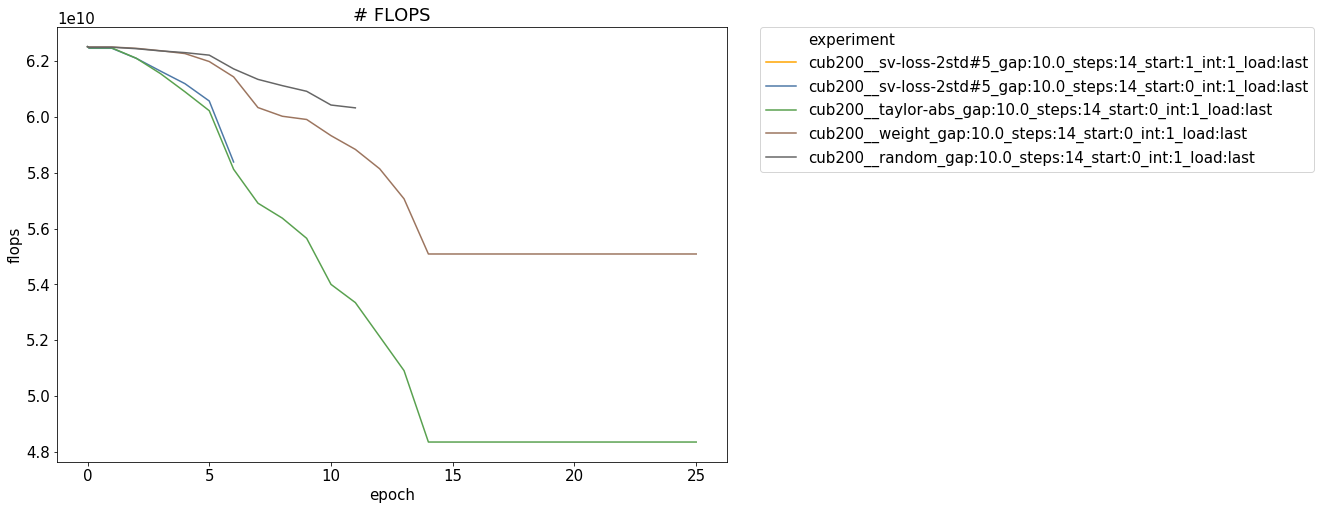

In [4]:

# for label in plotting_data:
fig = plt.figure(figsize=(12,8))
experiments = plot_df['experiment'].unique()
for exp in experiments:
    method_name = exp.split("__")[1].split("_")[0]
    if method_name not in map_names:
        continue
    label, color = map_names[method_name]
    d = plot_df[plot_df["experiment"] == exp]
    acc = d.groupby(["epoch"]).mean()["test_acc"]
    acc_pp = d.groupby(["epoch"]).mean()["test_acc_pp"]
    ticks = np.arange(len(acc))
    ax1 = plt.plot(ticks, acc, label=label, color=color)
    ax2 = plt.plot(ticks+1, acc_pp, color=color, linestyle="dashed")

format_plt(plt.gca(), f"Iterative pruning", "Epoch", "Test Accuracy")
handles, labels = plt.gca().get_legend_handles_labels()
handles, labels  = zip(*sorted(zip(handles, labels), key=lambda t: 1 if "SV" in t[1] else -1))
fig.subplots_adjust(bottom=.35)
fig.legend(handles, labels,loc='best', bbox_to_anchor=(0.8, 0.5), ncol=1)



plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="test_loss", hue="experiment", data = plot_df)
plt.title("Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="train_loss", hue="experiment", data = plot_df)
plt.title("Train Loss")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="train_time", hue="experiment", data = plot_df)
plt.title("Train Time / Epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="total_time_cum", hue="experiment", data = plot_df)
plt.title("Train Time / Epoch")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="n_params", hue="experiment", data = plot_df)
plt.title("# Parameters")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.figure(figsize=(12,8))
ax = sns.lineplot(x="epoch", y="flops", hue="experiment", data = plot_df)
plt.title("# FLOPS")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
